<a href="https://colab.research.google.com/github/yuanfeiwo/test-firstrepository/blob/master/Module3_Unsupervised_Learning_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lending Club Data
## Unsupervised Learning: Dimension Reduction

In [36]:
import pandas as pd
import seaborn as sns

In [37]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=232422 sha256=b872f23907ffac3c10a79321b265d789f501d57f4a1e9bcc450649583d89f05e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ky482jyu/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [38]:
df = pd.read_csv('https://mlinfinance.s3-us-west-2.amazonaws.com/Module2-ExploratoryDataAnalysis/LendingClubLoan.csv', sep=',', low_memory=False)

In [39]:
df.head()

loan_amnt        term  ...  inq_last_6mths  loan_status_Binary
0       5000   36 months  ...               1                   0
1       2500   60 months  ...               5                   1
2       2400   36 months  ...               2                   0
3      10000   36 months  ...               1                   0
4       3000   60 months  ...               0                   0

[5 rows x 17 columns]

In [40]:
import pandas_profiling as ppf
profile = ppf.ProfileReport(df)

In [41]:
profile

#Handing Categories

* Convert column grade to an ordinal variable. See https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [43]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [53]:
newdf = df
newdf.reset_index(inplace=True)

In [55]:
newdf[['index','grade']]

index grade
0         0     B
1         1     C
2         2     C
3         3     C
4         4     B
...     ...   ...
9994   9994     C
9995   9995     C
9996   9996     C
9997   9997     D
9998   9998     E

[9999 rows x 2 columns]

In [57]:
enc.fit(newdf[['index','grade']])

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [61]:
enc.categories_

[array([   0,    1,    2, ..., 9996, 9997, 9998]),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)]

In [59]:
enc.transform(newdf[['index','grade']])

array([[0.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       ...,
       [9.996e+03, 2.000e+00],
       [9.997e+03, 3.000e+00],
       [9.998e+03, 4.000e+00]])

* Convert column **term** to a one-hot encoding. See https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [66]:
from sklearn.preprocessing import OneHotEncoder
enc2 = OneHotEncoder(handle_unknown='ignore')

In [79]:

enc2.fit(newdf[['index','term']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [71]:
enc2.categories_

[array([   0,    1,    2, ..., 9996, 9997, 9998]),
 array([' 36 months', ' 60 months'], dtype=object)]

In [82]:
#enc2.transform(newdf[['index','term']])
onehot = enc2.transform(newdf[['index','term']])
onehot

<9999x10001 sparse matrix of type '<class 'numpy.float64'>'
	with 19998 stored elements in Compressed Sparse Row format>

In [85]:
import pandas as pd
dummies = pd.get_dummies(df['term'],drop_first=False)

In [86]:
dummies

36 months   60 months
0              1           0
1              0           1
2              1           0
3              1           0
4              0           1
...          ...         ...
9994           0           1
9995           1           0
9996           0           1
9997           1           0
9998           1           0

[9999 rows x 2 columns]

* Choose 3-4 numerical variables and do PCA on it; Interpret the principal components

In [81]:
df.corr()

index  loan_amnt  ...  inq_last_6mths  loan_status_Binary
index               1.000000  -0.020329  ...       -0.006371           -0.034553
loan_amnt          -0.020329   1.000000  ...        0.020110            0.057583
int_rate           -0.097118   0.323275  ...        0.191826            0.223080
installment        -0.049752   0.939621  ...        0.026811            0.032686
annual_inc          0.065353   0.377441  ...        0.040267           -0.070794
dti                -0.049032   0.034631  ...        0.023101            0.047211
delinq_2yrs         0.042398  -0.043718  ...       -0.001533            0.026561
inq_last_6mths     -0.006371   0.020110  ...        1.000000            0.067063
loan_status_Binary -0.034553   0.057583  ...        0.067063            1.000000

[9 rows x 9 columns]

In [87]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [88]:
pca.fit(df[['loan_amnt','int_rate','annual_inc','dti']])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [89]:
print(pca.explained_variance_ratio_)


[0.97442338 0.0255766 ]


In [90]:
print(pca.singular_values_)


[4842592.66788868  784558.73051564]


In [91]:
pca.components_

array([[ 6.79714636e-02,  8.31288840e-06,  9.97687265e-01,
        -2.41572656e-05],
       [-9.97687247e-01, -1.67900505e-04,  6.79714615e-02,
        -9.43640546e-05]])

* You are trying to figure out if the **grades** of the loan can be used as labels and if you could visualize the PCA outcomes to visualize the loans. Perform PCA and using **grades** of the loan as your labels, plot in a 2-D graph.
See https://plotly.com/python/v3/ipython-notebooks/principal-component-analysis/ for examples

In [95]:
import plotly.express as px

#df = px.data.iris()
features = ['loan_amnt','int_rate','annual_inc','dti']

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color='grade'
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [98]:
#df = px.data.iris()
features = ['loan_amnt','int_rate','annual_inc','dti']

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df['grade']
)
fig.update_traces(diagonal_visible=False)
fig.show()


* Change the label to **verification_status** on the PCA plot. Interpret your findings

In [99]:
#df = px.data.iris()
features = ['loan_amnt','int_rate','annual_inc','dti']

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df['verification_status']
)
fig.update_traces(diagonal_visible=False)
fig.show()


In [103]:
total_var = pca.explained_variance_ratio_
print('Total Explained Variance:', total_var)


Total Explained Variance: [9.74423380e-01 2.55765955e-02 1.74393070e-08 6.60759042e-09]


* Use t-SNE to plot the loan dataset. Try it with different perplexity values and repeat the above exercise

In [104]:
from sklearn import manifold, datasets


In [106]:
method = manifold.TSNE(n_components=2, init='pca',
                                 random_state=0)

In [108]:
method.fit_transform(df[features])

array([[-46677.035 ,   4881.758 ],
       [-40891.613 ,   7616.5073],
       [-58617.89  ,   6492.7476],
       ...,
       [-20992.973 ,  -3569.8862],
       [ 60951.45  ,  13436.527 ],
       [-36415.758 ,  -4618.148 ]], dtype=float32)

In [109]:
Y = method.fit_transform(df[features])

In [116]:
X, color = datasets.make_s_curve(9999, random_state=0)


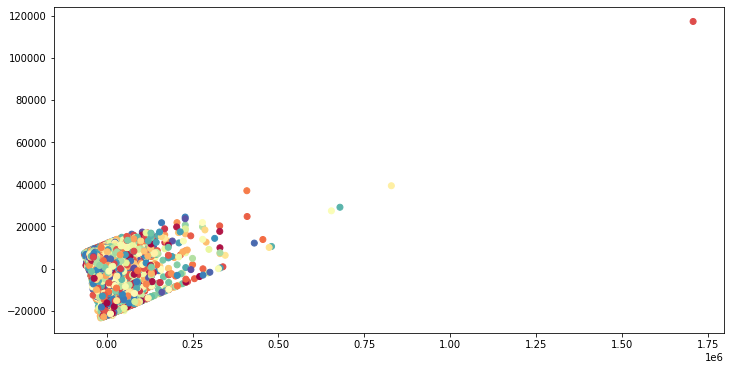

In [117]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)


Automatically created module for IPython interactive environment
LLE: 0.17 sec
t-SNE: 7.9 sec


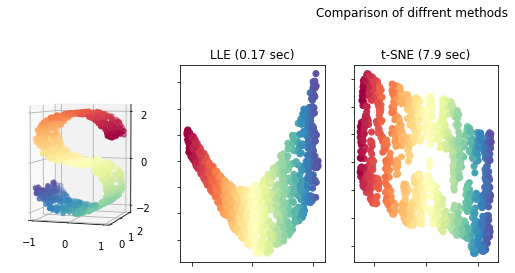

In [118]:
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>
# Edited by QuantUniversity

print(__doc__)

from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Comparison of diffrent methods")

# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()